##  Supervised Learning
## Week 6: Classification


Alexander Goncearenco

March 14, 2019


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Outline:
1. Classification problems in machine learning
1. Overview of classification methods
1. Implementing basic classification methods with and without sklearn
1. Evaluating performace of classification models
1. Cross-Validation techniques

## 1. Classification problems in machine learning

In general, a supervised learning problem requires a dataset of __examples__, where each example can have several  __features__, and a list of __labels__ corresponding to the examples.

Once the model has been trained (learned), we can use it to predict labels for new data.


If the label is continuous numeric variable, it becomes a **regresson** problem. 

If the label is a categorical variable, it becomes a **classification** problem. 

### Types of classification problems

In classification we distinguish:

* binary classification: predicting one of the two classes (e.g. Healthy vs Disease)

* multiclass classification: predicting one of more than two classes (e.g. Dog, ShortCoat)

* multilabel classification: predicting several class labels out of more than two classes (e.g. Dog and Horse)


### Strategies to approach multiclass classification

1. Transformation to binary classification:
    - One-vs-All creates $C$ classifiers, where $C$ is the number of classes, e.g. Dog vs All, Horse vs All
    
    - One-vs-One creates $C(C − 1) / 2$ binary classifiers, where $C$ is the number of classes:  e.g. Dog vs Horse, Dog vs Cat, Dog vs Fish ...., Horse vs Cat, Horse vs Fish ...
    
2. Extension of binary classification methods, e.g. KNearestNeighbors(). Not all methods can be extended to multiclass problem case 

###  Classification (categoric label) vs Regression (continuous label)

Regression and classification methods are related: consider that we predicting the probability of belonging to class A as in binary classification. Probability is a continuous numeric variable. Thus, for instance, Logistic Regression is a classification method.


### Classification (supervised) vs Clustering (unsupervised)
In clustering we attempt to group observations in such a way that observations assigned to the same cluster are more similar to each other than to observations in other clusters. There is no cluster assignment needed to learn from, the number of categories (clusters) is usually unknown too.


### Semi-supervised Learning
 - small amounts of labeled data, where class is known
 - large amounts of unlabeled data
 
Learning from unlabeled data may help to improve classification performance. We will leave this type of learning problems out of our scope today.

### A simple one-dimensional problem

The task is to classify pixels in an image as object and background classes (binary) based on their intensities.
Pixel intensity threshold is our only parameter to learn.
We calculate a histogram of pixel intensities and introduce a threshold separating object from background.

In [6]:
!conda install -q -y scikit-image
# !pip install scikit-image

Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/agoncear/anaconda/envs/jupyter

  added / updated specs:
    - scikit-image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cloudpickle-0.8.0          |           py37_0          31 KB
    cytoolz-0.9.0.1            |   py37h1de35cc_1         344 KB
    dask-core-1.1.4            |             py_0         531 KB
    decorator-4.3.2            |           py37_0          17 KB
    imageio-2.5.0              |           py37_0         3.3 MB
    matplotlib-3.0.3           |   py37h54f8f79_0         6.6 MB
    networkx-2.2               |           py37_1         2.0 MB
    olefile-0.46               |           py37_0          48 KB
    pillow-5.4.1               |   py37hb68e598_0         574 KB
    pyparsing-2.3.1            |           py37_0         105 KB
    python-dateutil-2.8.0      |    

(512, 512)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


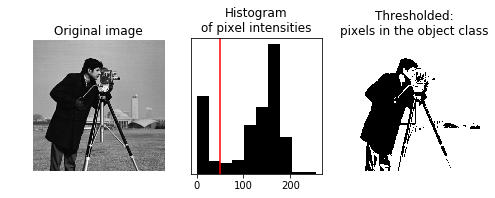

In [15]:
from skimage.data import camera

image = camera()
print(image.shape)
thresh = 50
binary = image > thresh
print(binary)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.axis('off')

ax2.hist(image.flatten(), color='k')
ax2.get_yaxis().set_visible(False)
ax2.set_title('Histogram\nof pixel intensities')
ax2.axvline(thresh, color='r')

ax3.imshow(binary, cmap=plt.cm.gray)
ax3.set_title('Thresholded:\npixels in the object class')
ax3.axis('off')

plt.show()

### Digits dataset is an example of a classification problem

* We can consider classification of digits as a __multiclass classification__ or as __10 binary One-vs-All classification__ problems

### Question: 
What would the classification problem look like if each image contained more than one digit?

E.g. 12 -  identify labels 1 and 2.

In [20]:
from sklearn import datasets 

digits = datasets.load_digits()

# X - how digits are handwritten
X = digits['data']
print(X.shape)

# y - what these digits actually are
y = digits['target']
print(y.shape)
print("Digits are classes:", set(y))

(1797, 64)
(1797,)
Digits are classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [38]:
def plot_digit_example(i):
    print("64 pixel image is assigned class label", y[i])
    fig, ax = plt.subplots(figsize=(1.6, 1.6))
    plt.imshow(X[i].reshape((8,8)),  cmap=plt.cm.gray)
    plt.show()

64 pixel image is assigned class label 5


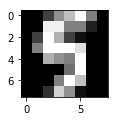

64 pixel image is assigned class label 2


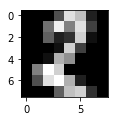

64 pixel image is assigned class label 1


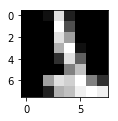

In [43]:
plot_digit_example(1700)
plot_digit_example(50)
plot_digit_example(1000)

## 2. Overview of classification methods

Many of the method implement discriminative learning of linear classifiers under convex loss functions.

* **Nearest Neighbors classifier**

http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification



* **Logistic Regression**

http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



* **Neural networks**:
    - Simplest example - Perceptron is very similar to logistic regression  http://scikit-learn.org/stable/modules/linear_model.html#perceptron
   


* **Linear and Quadratic Discriminant Analysis**
http://scikit-learn.org/stable/modules/lda_qda.html

    - Advantage: closed-form solution, no hyperparameters, can extend to multiclass classification.

    - Disadvantage: assumptions about distibutions: Gaussian


* **Support Vector Machines** - SVM Classifier: SVC http://scikit-learn.org/stable/modules/svm.html#classification

    Optimize a hinge loss functions that defines the width of the decision boundary separating the classes. Support vectors are the examples from two classes closest to the boundary. The larger the boundary - the better. 
    Advantages include linear and nonlinear options with different kernels. Disadvantage is compuational complexity, does not scale well.
    

* A generalized version of linear classifiers **Stochastic Gradient Descent**:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
SGDC has a choice of loss functions: hinge (as in SVM), log (as in logistic regression), ... and supports regularization.
SGDC updates by calculating the gradient for each example separately, so it can be trained on very large datasets: out-of-core training with .partial_fit().


* **Decision tree**
http://scikit-learn.org/stable/modules/tree.html#classification


* **Ensemble methods**:

    - **Gradient Boosting** approach  http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

    - Bagging approaches:

        - **Voting**
        http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

        - **RandomForest**
        http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


* **Naive Bayes** classifier:
http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

    NB Can be extended to multiclass probelems. Can handle out-of-core training on large datasets easily.


* For time series there exist different methods, like **Gaussian process** classifier:
http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc


## 3. Implementing basic classification methods with and without sklearn

## Logistic Regression

$$z = x^T W + b $$

$$p = \frac{1}{1 + e^{-z}} $$

$$Loss = y - p $$

$$Cost = \sum_{examples} −(y log(p) + (1−y)log(1−p)) $$

Based on https://visualstudiomagazine.com/Articles/2018/01/04/logistic-regression.aspx?Page=1

In [144]:
def cross_entropy(y, p):
    #     if y == 1:
    #       return -log(p)
    #     else:
    #       return -log(1 - p)
    return -np.sum( y * np.log(p) + (1 - y) * np.log(1-p))

# training data:
X = np.array([
    [1.5, 2.5],
    [3.5, 4.5],
    [6.5, 6.5],
    [4.5, 1.5],
    [5.5, 3.5],
    [7.5, 3.5]])

# training labels:
y = np.array([1,1,1,0,0,0])

# initializing the coefficients
W = np.random.uniform(low = -0.01, high=0.01, size=X.shape[1]) # w1 w2 ...
b = np.random.uniform(low = -0.01, high=0.01) # bias

# we stop when there are no significant improvement in
cost_threshold = 0.5

alpha = 0.01 # learning rate defines how large the updates are on each iteration
# there is a trade-off between converging fast and overshooting the optimization target

for _ in range(10000):
    i = np.random.randint(low=0, high=X.shape[0])
    z = np.dot(X[i,], W) + b
    p = 1.0 / (1.0 + np.exp(-z))

    # update all weights
    # gradient ascent log likelihood
    W += alpha * X[i,] * (y[i] - p)
    b += alpha * (y[i] - p)
    
    # print debug information once in a while
    # stop if converged
    if not _ % 500:
        z = np.dot(X, W) + b
        p = 1.0 / (1.0 + np.exp(-z))
        cost = cross_entropy(y, p)
        print(_, cost)
        if cost < cost_threshold:
            break

print("\nModel coefficients")
print("W", W, "\nb", b)

0 4.164090741889398
500 1.0595396316126915
1000 0.5562550808191428
1500 0.39162173801502986

Model coefficients
W [-1.55263407  1.89030257] 
b 0.07407288848506441


### Now that the logistic regression model is trained we can predict values

In [145]:
z = np.dot(X, W) + b
p = 1.0 / (1.0 + np.exp(-z))
print("\nOriginal labels ", y)
print("Predicted proba ", np.round(p, 2))
print("Predicted labels", np.round(p).astype(int))

x = np.array([[4.2, 0.7]])
z = np.dot(x, W) + b
p = 1.0 / (1.0 + np.exp(-z))
print(p)


Original labels  [1 1 1 0 0 0]
Predicted proba  [0.92 0.96 0.91 0.02 0.14 0.01]
Predicted labels [1 1 1 0 0 0]
[0.00591825]


### With scikit-learn

In [147]:
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score, precision_score

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X, y)
# print(lr.coef_)
# print(lr.intercept_)
# print(y)
# print(lr.predict(X))

print("\nOriginal labels ", y)
print("Predicted labels", lr.predict(X))
print(lr.predict_proba(X))

print("Prediction of label for one point: ", lr.predict(x))


Original labels  [1 1 1 0 0 0]
Predicted labels [1 1 1 0 0 0]
[[0.17756277 0.82243723]
 [0.14399378 0.85600622]
 [0.22639916 0.77360084]
 [0.85876556 0.14123444]
 [0.67965885 0.32034115]
 [0.91363321 0.08636679]]
Prediction of label for one point:  [0]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


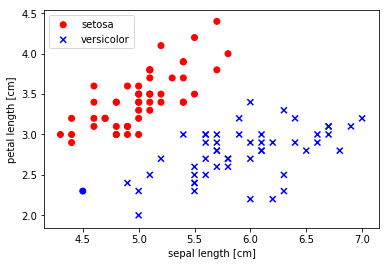

In [148]:
from sklearn import datasets

iris = datasets.load_iris()
y = iris.target

# select setosa and versicolor and ignore the third class label
# extract sepal length and petal length
X = iris.data[y < 2, :2]  # [take labels 0 or 1, features 0 and 1]
y = y[y<2]

lr = LogisticRegression(C=0.1)
lr.fit(X, y)
print(y)
pred_y = lr.predict(X)
print(pred_y)

# plot data
colors = np.where(pred_y == 0.0, 'red', 'blue')
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color=colors[y == 0], marker='o', label='setosa')

plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color= colors[y==1], marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

# Color shows prediction
# Shape shows actual value

## Nearest Neighbor classifier

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/266px-KnnClassification.svg.png)

Predict class of green dot based on 3 nearest neighbors, 5 nearest neighbors (dashed).
K neighbors is a hyperparameter.

Note that there is also sklearn.neighbors.RadiusNeighborsClassifier(radius)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


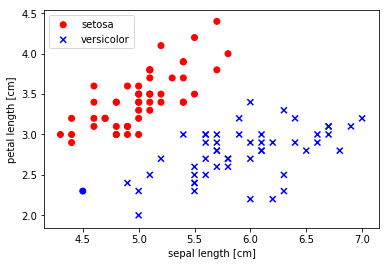

In [149]:
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
y = iris.target
# select setosa and versicolor
# extract sepal length and petal length
X = iris.data[y < 2, :2]
y = y[y<2]

clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X, y)
print(y)
pred_y = clf.predict(X)
print(pred_y)

# plot data
colors = np.where(pred_y == 0.0, 'red', 'blue')
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color=colors[y == 0], marker='o', label='setosa')

plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color= colors[y==1], marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

## Can we now implement solutions for NaiveBayes and SVC?

In-class or at home exercise.

##### Evaluating performace of classifiers

### Comparing predicted class labels to actual class labels

Consider two classes 0 and 1. For a given test dataset we obtain a vector of predicted class labels and compare it to the vector of actual class labels.

For instance,

Actual:    [0, 1, 1, 0]

Predicted: [0, 0, 1, 1]

For class 1: [TN, FN, TP, FP]

* TP - True Positive 
* TN - True Negative 
* FP - False Positive (Type I error in statistics)
* FN - False Negative (Type II error in statistics)

Although classes 0 and 1 look interchangeable, the interpretation of the results very much depends on the meaning of each class for your domain-specific problem. For instance, consider a hypotetical test where class 1 means disease and class 0 means healthy and interpret TP, TN, FP, FN.

#### Confusion matrix

Confusion matrix describes a binary classifier.

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


<table>
			<tbody><tr>
				<td colspan="2" rowspan="2"></td>
				<td colspan="2">Predicted</td>			
			</tr>
			<tr>
				<td>Negative</td>
				<td>Positive</td>
			</tr>
			<tr>
				<td rowspan="2">Actual</td>
				<td>Negative</td>
				<td><b>TN</b></td>
				<td><b>FP</b></td>
			</tr>
			<tr>
				<td>Positive</td>
				<td><b>FN</b></td>
				<td><b>TP</b></td>
			</tr>
		</tbody>
</table>

considering Class 0 = Negative and Class 1 = Positive  in our trivial case it will become:

<table>
			<tbody><tr>
				<td colspan="2" rowspan="2"></td>
				<td colspan="2">Predicted</td>			
			</tr>
			<tr>
				<td>Class 0</td>
				<td>Class 1</td>
			</tr>
			<tr>
				<td rowspan="2">Actual</td>
				<td>Class 0</td>
				<td><b>2453</b></td>
				<td><b>0</b></td>
			</tr>
			<tr>
				<td>Class 1</td>
				<td><b>0</b></td>
				<td><b>1234</b></td>
			</tr>
		</tbody>
</table>

From confusion matrix we can calculate a number of useful metrics:

* [Model evaluation in Scikit Learn](http://scikit-learn.org/stable/modules/model_evaluation.html)

* [Classification metrics in Scikit Learn](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)


#### Accuracy
$$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$$
How often is the classifier correct?

* [Accuracy score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

* Accuracy for binary classifiers is [Jaccard Similarity(http://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_similarity_score.html#sklearn.metrics.jaccard_similarity_score)


#### True positive rate, also Sensitivity or Recall
Out of all actual positive cases, how many do we predict as positive?
$$ TPR = Sensitivity = Recall = \frac{TP}{TP + FN} $$

#### False positive rate
Out of all actual negative cases, how many are predicted as positive?
$$ FPR = \frac{FP}{TN + FP} $$

#### Specificity 
Out of all actual negative cases, how many are predicted as negative?
$$ FPR = 1 - FRP $$

#### Precision (Positive predictive value)
Out of all predicted positive, how many are actually positive?
$$Precision = \frac{TP}{TP + FP}$$


### Combinations of scores:


#### F score ($F_1$ score, F-measure)

F score is a combination of precision and recall:

$$F_1 = \frac{2TP}{2TP + FP + FN}$$


Also consider **MCC** = Matthew’s Correlation Coefficient


## For imbalanced datasets it is important to access it properly

* [Imbalanced classification package](http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/evaluation/plot_classification_report.html#sphx-glr-auto-examples-evaluation-plot-classification-report-py)


#### Prevalence
Fraction of actually positive cases in the dataset? Shows if there is any imbalance between positive and negative cases.
$$Prevalence = \frac{TP + FN}{TP+FP+FN+TN}$$

#### Positive Predictive Value

Positive Predictive Value [PPV](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values) is similar to precision but takes into account imbalance of the dataset:

$$PPV = \frac{Sensitivity * Prevalence}{Sensitivity * Prevalence + (1 - Specificity) * (1 - Prevalence)}$$

Sometimes False Discovery Rate -- a complement of Positive Predictive Value is reported:
$$ FDR = 1 - PPV $$


### Prediction baseline

**Null Error Rate** is a baseline metric that shows how often a classifier would be wrong if it always predicted the class with highest prevalence (be it Positive or Negative).

For instance, if positive class is prevalent:

$$ Null = \frac{FP}{FP + TP} $$

Or in case of majority of negative cases:

$$ Null = \frac{FN}{FN + TN} $$


**Cohen's kappa** statistic calculates agreement between annotators [see more](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html)
In principle it can be used to compare observed accuracy (of a given classifier) to expected accuracy (random chance classifier). [see example with explanations](http://epiville.ccnmtl.columbia.edu/popup/how_to_calculate_kappa.html)



## Performance over all possible thresholds

**ROC Curve**: This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class.

#### Receiver operating characteristic curve (ROC curve)

ROC curve illustrates the performance of a binary classifier system as its *discrimination threshold* is varied by plotting True Positive rate vs False Positive rate. It can also be referred to as a Sensitivity vs (1-Specificity) plot.

In order to make the plot you need to obtain a list of scores for each classified data point. They can be typically obtained with **.predict_proba()** or in some cases with **.decision_function()**.

* https://en.wikipedia.org/wiki/Receiver_operating_characteristic
* http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Area under ROC curve [AUC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) is a quantitative characteristic of a binary classifier.

In a cross-validataion setting mean and variance of ROC AUC are useful measures of classifier robustness [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)

#### Precision-Recall curve

In some cases Precision and Recall plots are used for characterizing classifier performance as its *discrimination threshold* is varied.

* http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

As in the case of ROC, are under Precision-Recall curve can be calculated.

### In the example below we will use digits dataset with One-vs-Rest classification strategy

In [72]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# digits dataset
digits = datasets.load_digits()
X = digits['data']
y = digits['target']

# Binarize the output
y_bin = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = y_bin.shape[1]
# now we have one binary column for each class instead of one column with many class names

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

precision = {}
recall = {}
pr_auc = {}

# we calculate 10 curves, one for each class
for i in range(n_classes):
    # ROC:
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Precision-recall:
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    pr_auc[i] = average_precision_score(y_test[:, i], y_score[:, i])

### Note that with One-Vs-Rest we have C models that we can evaluate

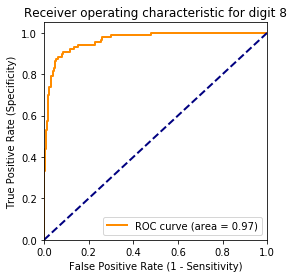

In [151]:
## Plot ROC performance for a given digit
digit = 8

plt.figure(figsize=(4,4))
plt.plot(fpr[digit], tpr[digit], color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[digit])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Sensitivity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.title('Receiver operating characteristic for digit ' + str(digit))
plt.legend(loc="lower right")
plt.show()

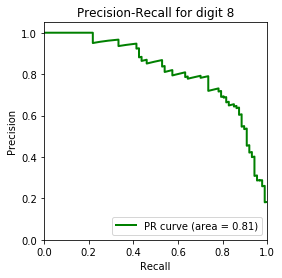

In [152]:
# Plot only one Precision-Recall curve for selected class
digit = 8

plt.figure(figsize=(4,4))
plt.plot(recall[digit], precision[digit], color='green',
         lw=2, label='PR curve (area = %0.2f)' % pr_auc[digit])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for digit ' + str(digit))
plt.legend(loc="lower right")
plt.show()

### Let us consider an example with One-Vs-Rest linear SVM classifier for digits dataset

In [154]:
# digits dataset
digits = datasets.load_digits()
X = digits['data']
y = digits['target']

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

### Confusion matrix

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  1,  1,  0,  0,  0,  1,  1,  1],
       [ 0,  0, 54,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 49,  0,  1,  1,  0,  2,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0, 54,  0,  1,  0,  0],
       [ 1,  0,  1,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 52,  0,  2],
       [ 0,  3,  2,  1,  1,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 48]])

### Classification Report for multiclass case



In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       0.98      0.86      0.92        59
           2       0.93      0.98      0.96        65
           3       0.90      0.90      0.90        49
           4       0.89      1.00      0.94        50
           5       0.91      0.95      0.93        62
           6       0.98      0.96      0.97        48
           7       1.00      0.94      0.97        51
           8       0.95      0.87      0.91        45
           9       0.92      0.94      0.93        50

   micro avg       0.94      0.94      0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



Although here we have a balanced dataset with approx. equal support for each class, note the micro and macro averaging techniques:

**"macro"** simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.


**"weighted"** accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.


**"micro"** gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.

## 5. Cross-Validation techniques


Note that now class label becomes important:

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0041.png)

Compare KFold to StratifiedKFold:

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0071.png)

And compare them to GroupKFold:

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0051.png)

### Example: Multinomial Naive Bayes applied to multiclass problem. Evaluated with Stratified KFold cross-validation

In [157]:
# from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
# import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import pprint

digits = datasets.load_digits()
X = digits['data']
y = digits['target']

nb = MultinomialNB()
cv = StratifiedKFold(n_splits=5)
scores = cross_validate(nb, X, y, cv=cv,
                         scoring=('accuracy', 'f1_micro'),
                         return_train_score=True)
pprint.pprint(scores)
print()
print('mean TRAIN accuracy: ', np.round(scores['train_accuracy'].mean(), 2))
print('mean TEST  accuracy: ', np.round(scores['test_accuracy'].mean(), 2))

{'fit_time': array([0.00130415, 0.00210595, 0.00126886, 0.00177193, 0.00131822]),
 'score_time': array([0.00094199, 0.00149298, 0.00091386, 0.00097489, 0.00145197]),
 'test_accuracy': array([0.88736264, 0.83425414, 0.8551532 , 0.94677871, 0.83380282]),
 'test_f1_micro': array([0.88736264, 0.83425414, 0.8551532 , 0.94677871, 0.83380282]),
 'train_accuracy': array([0.91416609, 0.91358885, 0.90403338, 0.89722222, 0.91747573]),
 'train_f1_micro': array([0.91416609, 0.91358885, 0.90403338, 0.89722222, 0.91747573])}

mean TRAIN accuracy:  0.91
mean TEST  accuracy:  0.87


### Optimization of hyperparameters

There are recommended strategies how to train models that require hyperparameter tuning. For instance, in case of KNN classifier, k is a hyperparameter.

Scikit-learn documentation covers the topic: https://scikit-learn.org/stable/modules/cross_validation.html


<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="500">


If hyperparameter tuning is involved:

1. evaluate performance using nested cross-validation (illustrated below)

1. find optimal hyperparameters using all data (shown on the schema above)

1. train model (with optimal hyperparameters) on all data (shown on the schema above)


### Nested cross-validation

Nested cross-validation repeats this assessment multiple times. Read "parameters" as "hyperparameters"

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500">
    
    

In [158]:
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# CV iterators
inner_cv_iterator = ShuffleSplit(n_splits=5, random_state=10)
outer_cv_iterator = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Hyperparameter optimization:

# (Hyper)parameter grid
p_grid = {
    "n_neighbors": [3, 5, 7, 9]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=p_grid, cv=inner_cv_iterator)
cross_val_score(estimator=grid_search, X=X, y=y, cv=outer_cv_iterator, scoring='accuracy')


array([0.99175824, 0.97513812, 0.98885794, 0.98319328, 0.98028169])

### Finding hyperparameters and learning a model 

Now let us implement steps 2 and 3.

We need to create a holdout dataset.

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
X = digits['data']
y = digits['target']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
# print(len(tuple(sss.split(X, y))))
train_index, test_index = tuple(sss.split(X, y))[0]
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

knn = KNeighborsClassifier()

# (Hyper)parameter grid
p_grid = {
    "n_neighbors": [3, 5, 7, 9]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
g = GridSearchCV(knn, p_grid, cv=cv)

g.fit(X, y)
best = g.best_params_
cv = g.cv_results_

print('GridSearch found optimal number of neighbors:', best['n_neighbors'])
print('Mean CV test scores are:', cv['mean_test_score'])

knn = KNeighborsClassifier(n_neighbors = best['n_neighbors']) 
knn.fit(X_train, y_train)

print('Accuracy:', accuracy_score(y_test, knn.predict(X_test)))


GridSearch found optimal number of neighbors: 5
Mean CV test scores are: [0.98553144 0.98608792 0.98441848 0.98163606]
Accuracy: 0.9888888888888889
